# Phase 1 Instructions

The purpose of this file is to analyse the phase 1 data. It will extract the journey time for each patient. It then removes outliers and creates visualisations based on the remaining patients.

## Package and Function Requirements

The next section loads in the required functions and packages.

In [ ]:
def lookup(date_pd_series, format=None):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
    return date_pd_series.map(dates)

## File Load In

Please note that the file used for phase 1 is called phase1_all.csv. It is in the MS Teams folder. 

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import datetime as dt
import math
import seaborn as sns
import scipy.stats as sps
from scipy import stats
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_list_noweekend = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

dftest = pd.read_csv('phase1_all.csv')

## Data Cleaning and Formatting

The section below is very similar if not the same across all three phases. Key differences are called out but this is where the data is formatted for analysis.

In [ ]:
dftest.dtypes

Patient     object
Location    object
from        object
to          object
dtype: object

In [ ]:
dftest = dftest.dropna()
dftest[['xlocation', 'ylocation']] = dftest['Location'].str.split(',', expand = True)
#dftest['from'] = pd.to_datetime(dftest['from'])
#dftest['to'] = pd.to_datetime(dftest['to'])

In [ ]:
dftest

,Patient,Location,from,to,xlocation,ylocation
0,fdsds,"7.356,6.028","07/10/2021, 11:55:43","07/10/2021, 11:55:45",7.356,6.028
1,fdsds,"10.551,4.856","07/10/2021, 11:55:45","07/10/2021, 11:55:49",10.551,4.856
2,fdsds,"7.296,7.093","07/10/2021, 11:55:49","07/10/2021, 12:01:22",7.296,7.093
3,fdsds,"10.463,7.237","07/10/2021, 12:01:22","07/10/2021, 12:02:11",10.463,7.237
4,fdsds,"7.241,7.678","07/10/2021, 12:02:11","07/10/2021, 12:08:13",7.241,7.678
...,...,...,...,...,...,...
76647,Test,"19.754,4.009","26/11/2021, 17:46:45","26/11/2021, 23:00:04",19.754,4.009
76648,Test 2,"12.589,3.301","23/11/2021, 17:07:36","23/11/2021, 17:07:52",12.589,3.301
76649,Test 2,"12.089,4.21","23/11/2021, 17:07:52","23/11/2021, 17:08:05",12.089,4.21
76650,Test 2,"11.849,4.579","23/11/2021, 17:08:05","23/11/2021, 17:08:47",11.849,4.579


## Key Difference to other Phases

Please note that the data for phase 1 is in a different format to the other phases. This is reflected in the code below.

In [ ]:
dftest['newfrom'] = lookup(dftest['from'], format='%d/%m/%Y, %H:%M:%S')
dftest['newto'] = lookup(dftest['to'], format='%d/%m/%Y, %H:%M:%S')

In [ ]:
discard = ['f', 'T']
dftest = dftest[~dftest.Patient.str.contains(('|'.join(discard)))]
dftest

,Patient,Location,from,to,xlocation,ylocation,newfrom,newto
5,G0132,"10.805,11.99","08/11/2021, 12:16:23","08/11/2021, 12:17:26",10.805,11.99,2021-11-08 12:16:23,2021-11-08 12:17:26
6,G0132,"9.721,11.419","08/11/2021, 12:17:26","08/11/2021, 12:17:52",9.721,11.419,2021-11-08 12:17:26,2021-11-08 12:17:52
7,G0132,"8.768,11.076","08/11/2021, 12:17:52","08/11/2021, 12:17:55",8.768,11.076,2021-11-08 12:17:52,2021-11-08 12:17:55
8,G0132,"7.41,9.57","08/11/2021, 12:17:55","08/11/2021, 12:17:57",7.41,9.57,2021-11-08 12:17:55,2021-11-08 12:17:57
9,G0132,"6.72,7.667","08/11/2021, 12:17:57","08/11/2021, 12:18:15",6.72,7.667,2021-11-08 12:17:57,2021-11-08 12:18:15
...,...,...,...,...,...,...,...,...
76599,R1089,"13.503,12.677","12/11/2021, 12:25:10","12/11/2021, 12:25:12",13.503,12.677,2021-11-12 12:25:10,2021-11-12 12:25:12
76600,R1089,"13.897,13.789","12/11/2021, 12:25:12","12/11/2021, 12:28:08",13.897,13.789,2021-11-12 12:25:12,2021-11-12 12:28:08
76601,R1089,"12.943,12.276","12/11/2021, 12:28:08","12/11/2021, 12:28:10",12.943,12.276,2021-11-12 12:28:08,2021-11-12 12:28:10
76602,R1089,"12.56,10.272","12/11/2021, 12:28:10","12/11/2021, 12:28:12",12.56,10.272,2021-11-12 12:28:10,2021-11-12 12:28:12


In [ ]:
dftest.dtypes

Patient              object
Location             object
from                 object
to                   object
xlocation            object
ylocation            object
newfrom      datetime64[ns]
newto        datetime64[ns]
dtype: object

## Key Section

The code belows gets the earliest and latest times from a patient allowing the total journey time to be tracked.

In [ ]:
dfgrouped = dftest.groupby('Patient', as_index = False).agg({'newfrom': ['min'], 'newto': ['max']})

In [ ]:
dfgrouped

,Patient,newfrom,newto
,,min,max
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09
...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32


## More Data Cleaning and Formatting

The code below changes column headers and continues to format and clean the data for subsequent analysis.

In [ ]:
flat_cols = []
for i in dfgrouped.columns:
    flat_cols.append(i[0]+'_'+i[1])

In [ ]:
dfgrouped.columns = flat_cols

In [ ]:
flat_cols

['Patient_', 'newfrom_min', 'newto_max']

In [ ]:
dfgrouped = dfgrouped.rename(columns={'Patient_': 'Patient'})
dfgrouped = dfgrouped.rename(columns={'newfrom_min': 'newfrom'})
dfgrouped = dfgrouped.rename(columns={'newto_max': 'newto'})

In [ ]:
dfgrouped

,Patient,newfrom,newto
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09
...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06


## Visit Length

The code below gets the visit length of the journey

In [ ]:
dfgrouped['visit_length'] = dfgrouped['newto'] - dfgrouped['newfrom']

## Day of Patient Visit

The code below gets the start and end date of the patient journey and subsequently removes any that do not begin and finish on the same day.

In [ ]:
dfgrouped['start_day'] = dfgrouped['newfrom'].dt.day
dfgrouped['end_day'] = dfgrouped['newto'].dt.day

In [ ]:
conditions = [dfgrouped['start_day'] == dfgrouped['end_day'], dfgrouped['start_day'] != dfgrouped['end_day']]
choices = ['equal', 'not_equal']
dfgrouped['sameday'] = np.select(conditions, choices)
dfgrouped['sameday'].unique()

array(['equal', 'not_equal'], dtype=object)

In [ ]:
dfgrouped = dfgrouped.drop(dfgrouped[dfgrouped.sameday == 'not_equal'].index)


In [ ]:
dfgrouped['visit_length'].max()

Timedelta('0 days 12:48:16')

In [ ]:
dfgrouped['visit_length'].describe()

count                         1039
mean     0 days 01:17:17.081809432
std      0 days 00:34:39.040935158
min                0 days 00:00:21
25%                0 days 00:59:51
50%                0 days 01:13:56
75%                0 days 01:30:50
max                0 days 12:48:16
Name: visit_length, dtype: object

In [ ]:
dfgrouped['dayofweek'] = dfgrouped['newfrom'].dt.day_name()
df_final= dfgrouped.dropna()

In [ ]:
dfgrouped

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday
...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday


In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday
...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday


## Day of the Week Analysis

In [ ]:
dayoftheweekmean = df_final.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Time of Day Analysis

Afternoon is defined as a journey starting from 13:00 onwards whereas any journey starting prior to 13:00 is defined as starting in the morning.

In [ ]:
def ftod(x):
    if (x>13):
        tod = 'afternoon'
    else:
        tod = 'morning'
    return tod

In [ ]:
df_final['tod'] = df_final.newfrom.dt.hour.map(ftod) 

In [ ]:
timeofdaymean = df_final.groupby('tod')['visit_length'].mean(numeric_only=False)

In [ ]:
timeofdaymean

tod
afternoon   0 days 01:14:53.967567567
morning     0 days 01:18:36.233183856
Name: visit_length, dtype: timedelta64[ns]

## More Day of the Week Analysis

In [ ]:
df_dayoftheweekmean = pd.DataFrame(data=dayoftheweekmean)

In [ ]:
df_dayoftheweekmean

,visit_length
dayofweek,
Monday,0 days 01:17:47.050847457
Tuesday,0 days 01:18:09.313364055
Wednesday,0 days 01:19:26.859903381
Thursday,0 days 01:18:58.891089108
Friday,0 days 01:11:05.124293785
Saturday,NaT
Sunday,NaT


In [ ]:
print('Monday')
Monday_count = df_final['dayofweek'][df_final['dayofweek']=='Monday'].count()
print(Monday_count)

print('Tuesday')
Tuesday_count = df_final['dayofweek'][df_final['dayofweek']=='Tuesday'].count()
print(Tuesday_count)

print('Wednesday')
Wednesday_count = df_final['dayofweek'][df_final['dayofweek']=='Wednesday'].count()
print(Wednesday_count)

print('Thursday')
Thursday_count = df_final['dayofweek'][df_final['dayofweek']=='Thursday'].count()
print(Thursday_count)

print('Friday')
Friday_count = df_final['dayofweek'][df_final['dayofweek']=='Friday'].count()
print(Friday_count)

print('Saturday')
Saturday_count = df_final['dayofweek'][df_final['dayofweek']=='Saturday'].count()
print(Saturday_count)

print('Sunday')
Sunday_count = df_final['dayofweek'][df_final['dayofweek']=='Sunday'].count()
print(Sunday_count)

Monday
236
Tuesday
217
Wednesday
207
Thursday
202
Friday
177
Saturday
0
Sunday
0


In [ ]:
weekday_data = {'dayofweek':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
          'count': [Monday_count , Tuesday_count , Wednesday_count , Thursday_count , Friday_count , Saturday_count , Sunday_count ]}
weekday_df = pd.DataFrame(weekday_data)

## Start of Starting Hour Analysis

Here we look to analyse if there are any differences by the hour at which the patient journey starts.

In [ ]:
df_final['hour'] = df_final['newfrom'].dt.hour

In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday,morning,12
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday,morning,13
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday,morning,10
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday,morning,10
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday,morning,11
...,...,...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday,morning,13
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday,afternoon,14
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday,afternoon,14
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday,afternoon,14


In [ ]:
hourlymean = df_final.groupby('hour')['visit_length'].mean(numeric_only=False)

In [ ]:
hourlymean

hour
9              0 days 01:15:02
10   0 days 01:19:54.556818181
11   0 days 01:22:07.307692307
12   0 days 01:17:54.963414634
13   0 days 01:10:39.025423728
14   0 days 01:18:26.982832618
15   0 days 01:09:19.346153846
16             0 days 01:00:18
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
df_final.dtypes

Patient                  object
newfrom          datetime64[ns]
newto            datetime64[ns]
visit_length    timedelta64[ns]
start_day                 int64
end_day                   int64
sameday                  object
dayofweek                object
tod                      object
hour                      int64
dtype: object

In [ ]:
print('Nine')
nine_count = df_final['hour'][df_final['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_final['hour'][df_final['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_final['hour'][df_final['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_final['hour'][df_final['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_final['hour'][df_final['hour']==13].count()
print(one_count)

print('Two')
two_count = df_final['hour'][df_final['hour']==14].count()
print(two_count)

print('Three')
three_count = df_final['hour'][df_final['hour']==15].count()
print(three_count)

print('Four')
four_count = df_final['hour'][df_final['hour']==16].count()
print(four_count)

Nine
10
Ten
264
Eleven
195
Twelve
82
One
118
Two
233
Three
130
Four
7


## Patient Condition Analysis

This analysis begins to compare the journies of patients with either Glaucoma or Medical Retina.

In [ ]:
df_final['condition'] = df_final['Patient'].str[0]

In [ ]:
conditionmean = df_final.groupby('condition')['visit_length'].mean(numeric_only=False)

In [ ]:
conditionmean

condition
G   0 days 01:22:49.271532846
R   0 days 01:06:34.285310734
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
print('Glaucoma')
glaucoma_count = df_final['condition'][df_final['condition']=='G'].count()
print(glaucoma_count)

print('Medical Retinal')
retina_count = df_final['condition'][df_final['condition']=='R'].count()
print(retina_count)

Glaucoma
685
Medical Retinal
354


## Converting Visit Length to Minutes

The following code converts the visit length into a more usable data format. The final data is an integer representing the number of minutes that the journey took to complete.

In [ ]:
def get_seconds(time_delta):
    return time_delta.seconds

time_delta_series = df_final['visit_length']

df_final['visit_length_minutes'] = time_delta_series.apply(get_seconds)

In [ ]:
df_final['visit_length_minutes'] = df_final['visit_length_minutes'] / 60

In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday,morning,12,G,76.0833
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday,morning,13,G,63.4833
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday,morning,10,G,86.8333
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday,morning,10,G,83.2333
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday,morning,11,G,104.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday,morning,13,R,50.5833
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday,afternoon,14,R,39.0000
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday,afternoon,14,R,29.2500
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday,afternoon,14,R,55.9833


## Initial Plots

These are the starting visualisations. Final versions are seen later in the notebook.

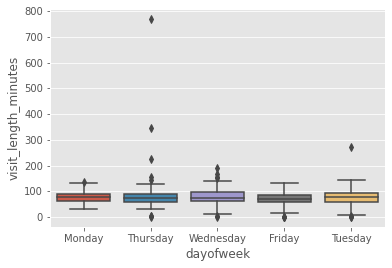

In [ ]:
axdayoftheweek = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_final)

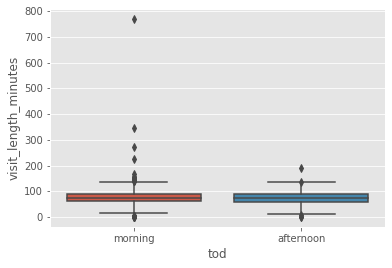

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_final)

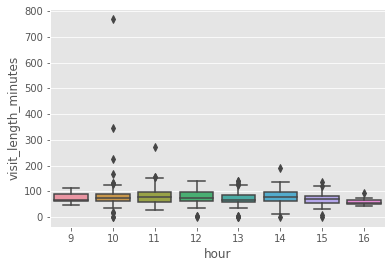

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_final)

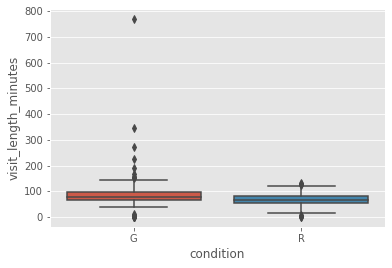

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_final)

## Outlier Removal

There are many odd outliers in this data. This section removes these outliers.

In [ ]:
df_outliers = df_final[(np.abs(stats.zscore(df_final['visit_length_minutes'])) < 3)]
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]
print(df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count())

Patient                 13
newfrom                 13
newto                   13
visit_length            13
start_day               13
end_day                 13
sameday                 13
dayofweek               13
tod                     13
hour                    13
condition               13
visit_length_minutes    13
dtype: int64


## Removal of 0 Minute Journeys

The section below creates a dataframe where journeys that have a journey time of 0 minutes are removed.

In [ ]:
df_nozero = df_outliers.loc[(df_outliers[['visit_length_minutes']] != 0).all(axis=1)]
df_nozero

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday,morning,12,G,76.0833
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday,morning,13,G,63.4833
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday,morning,10,G,86.8333
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday,morning,10,G,83.2333
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday,morning,11,G,104.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday,morning,13,R,50.5833
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday,afternoon,14,R,39.0000
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday,afternoon,14,R,29.2500
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday,afternoon,14,R,55.9833


## Start of Final Analysis

In [ ]:
mean = df_outliers['visit_length_minutes'].mean()
print(mean)
print(df_nozero['visit_length_minutes'].mean())

75.91436170212758
75.91436170212758


## Day of Week Analysis and Plots

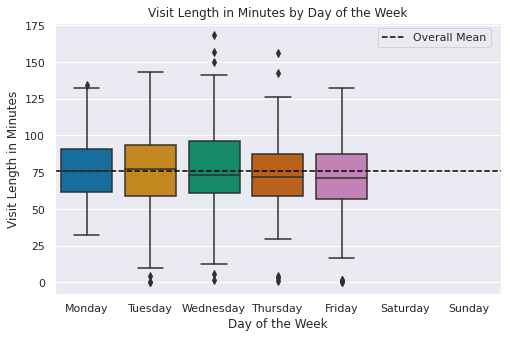

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated.png', bbox_inches='tight')

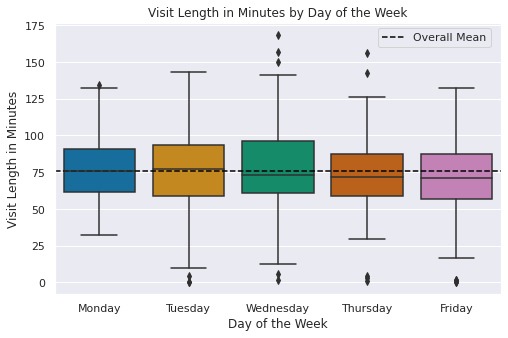

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list_noweekend)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated_noweekend.png', bbox_inches='tight')

## Time of Day Analysis and Plots

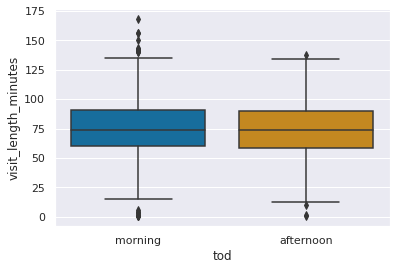

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)

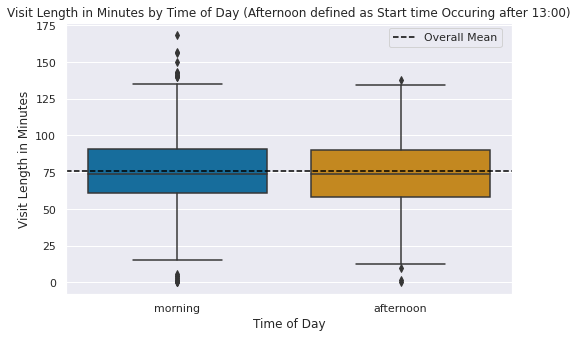

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Time of Day (Afternoon defined as Start time Occuring after 13:00)')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('timeofday_updated.png', bbox_inches='tight')

In [ ]:
df_outliers

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G0132,2021-11-08 12:16:23,2021-11-08 13:32:28,0 days 01:16:05,8,8,equal,Monday,morning,12,G,76.0833
1,G0167,2021-11-11 13:26:24,2021-11-11 14:29:53,0 days 01:03:29,11,11,equal,Thursday,morning,13,G,63.4833
2,G0501,2021-10-11 10:36:54,2021-10-11 12:03:44,0 days 01:26:50,11,11,equal,Monday,morning,10,G,86.8333
3,G0502,2021-10-11 10:53:59,2021-10-11 12:17:13,0 days 01:23:14,11,11,equal,Monday,morning,10,G,83.2333
4,G0503,2021-10-11 11:20:09,2021-10-11 13:04:09,0 days 01:44:00,11,11,equal,Monday,morning,11,G,104.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,R0865,2021-11-18 13:34:55,2021-11-18 14:25:30,0 days 00:50:35,18,18,equal,Thursday,morning,13,R,50.5833
1055,R0866,2021-11-18 14:03:49,2021-11-18 14:42:49,0 days 00:39:00,18,18,equal,Thursday,afternoon,14,R,39.0000
1056,R0867,2021-11-18 14:37:17,2021-11-18 15:06:32,0 days 00:29:15,18,18,equal,Thursday,afternoon,14,R,29.2500
1057,R0868,2021-11-18 14:39:07,2021-11-18 15:35:06,0 days 00:55:59,18,18,equal,Thursday,afternoon,14,R,55.9833


## Condition Analysis and Plots

In [ ]:
conditions = ['G', 'R']

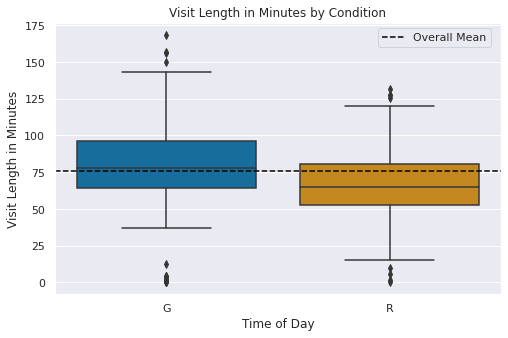

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers )
svm.set_title('Visit Length in Minutes by Condition')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('condition_updated.png', bbox_inches='tight')

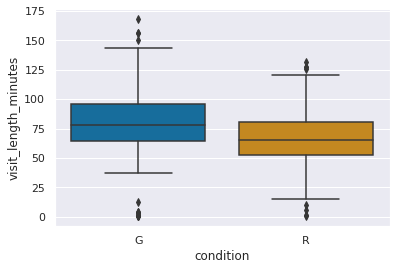

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers)

## Starting Hour Analysis and Plots

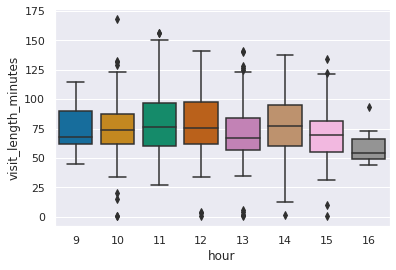

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)

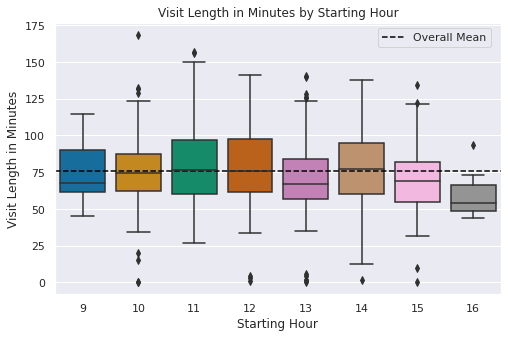

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Starting Hour')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Starting Hour')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('hour_updated.png', bbox_inches='tight')

## Summary Statistics of Each Analysis

The section below gets the summary statistics of each analysis done. These are used in the PowerPoint in the Findings folder in the MS Teams.

In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
df_outliers['visit_length_minutes'].describe()

count                                 1,034.0000
mean                                     75.9144
std                                      24.5362
min                                       0.3500
25%                                      59.8083
50%                                      73.7750
75%                                      90.5625
max                                     168.4667
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].describe()

count                                 1,039.0000
mean                                     77.2847
std                                      34.6507
min                                       0.3500
25%                                      59.8500
50%                                      73.9333
75%                                      90.8333
max                                     768.2667
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].median()

73.93333333333334

In [ ]:
df_outliers['visit_length'].describe()

count                         1034
mean     0 days 01:15:54.861702127
std      0 days 00:24:32.169369893
min                0 days 00:00:21
25%         0 days 00:59:48.500000
50%         0 days 01:13:46.500000
75%         0 days 01:30:33.750000
max                0 days 02:48:28
Name: visit_length, dtype: object

In [ ]:
df_final['visit_length'].describe()

count                         1039
mean     0 days 01:17:17.081809432
std      0 days 00:34:39.040935158
min                0 days 00:00:21
25%                0 days 00:59:51
50%                0 days 01:13:56
75%                0 days 01:30:50
max                0 days 12:48:16
Name: visit_length, dtype: object

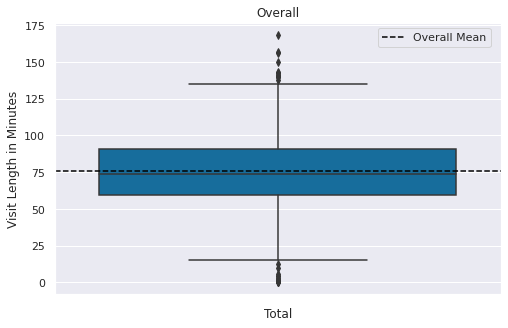

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(y="visit_length_minutes", data=df_outliers)
svm.set_title('Overall')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Total')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('tested.png', bbox_inches='tight')

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
10
Ten
261
Eleven
194
Twelve
82
One
118
Two
232
Three
130
Four
7


In [ ]:
print('Monday Outlier')
mondayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Monday'].count()
print(mondayoutlier)

print('Tuesday Outlier')
tuesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Tuesday'].count()
print(tuesdayoutlier)

print('Wednesday Outlier')
wednesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Wednesday'].count()
print(wednesdayoutlier)

print('Thursday Outlier')
thursdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Thursday'].count()
print(thursdayoutlier)

print('Friday Outlier')
fridayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Friday'].count()
print(fridayoutlier)

print('Saturday Outlier')
saturdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Saturday'].count()
print(saturdayoutlier)

print('Sunday Outlier')
sundayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Sunday'].count()
print(sundayoutlier)

Monday Outlier
236
Tuesday Outlier
216
Wednesday Outlier
206
Thursday Outlier
199
Friday Outlier
177
Saturday Outlier
0
Sunday Outlier
0


In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length_minutes'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
dayoftheweekmean

dayofweek
Monday                                       77.7842
Tuesday                                      77.2605
Wednesday                                    78.9038
Thursday                                     73.4363
Friday                                       71.0854
Saturday                                         NaN
Sunday                                           NaN
Name: visit_length_minutes, dtype: float64

In [ ]:
print('G')
glaucomacount = df_outliers['condition'][df_outliers['condition']=='G'].count()
print(glaucomacount)

print('R')
rcount = df_outliers['condition'][df_outliers['condition']=='R'].count()
print(rcount)

G
680
R
354


In [ ]:
conditionmean = df_outliers.groupby('condition')['visit_length_minutes'].mean(numeric_only=False)
conditionmean

condition
G                                    80.7782
R                                    66.5714
Name: visit_length_minutes, dtype: float64

In [ ]:
print('morning')
morningcount = df_outliers['tod'][df_outliers['tod']=='morning'].count()
print(morningcount)

print('afternoon')
afternooncount = df_outliers['tod'][df_outliers['tod']=='afternoon'].count()
print(afternooncount)

morning
665
afternoon
369


In [ ]:
todmean = df_outliers.groupby('tod')['visit_length_minutes'].mean(numeric_only=False)
todmean

tod
afternoon                                    74.5835
morning                                      76.6528
Name: visit_length_minutes, dtype: float64

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
10
Ten
261
Eleven
194
Twelve
82
One
118
Two
232
Three
130
Four
7


In [ ]:
hourmean = df_outliers.groupby('hour')['visit_length_minutes'].mean(numeric_only=False)
hourmean

hour
9                                     75.0333
10                                    75.6920
11                                    81.1460
12                                    77.9161
13                                    70.6504
14                                    77.9625
15                                    69.3224
16                                    60.3000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
124,G0627,2021-10-21 13:37:19,2021-10-21 13:41:30,0 days 00:04:11,21,21,equal,Thursday,morning,13,G,4.1833
139,G0642,2021-10-29 13:24:31,2021-10-29 13:26:15,0 days 00:01:44,29,29,equal,Friday,morning,13,G,1.7333
265,G0769,2021-10-29 13:24:23,2021-10-29 13:26:09,0 days 00:01:46,29,29,equal,Friday,morning,13,G,1.7667
303,G0807,2021-10-26 12:25:15,2021-10-26 12:29:41,0 days 00:04:26,26,26,equal,Tuesday,morning,12,G,4.4333
382,G0886,2021-11-05 10:45:33,2021-11-05 10:45:55,0 days 00:00:22,5,5,equal,Friday,morning,10,G,0.3667
397,G0901,2021-11-05 13:48:11,2021-11-05 13:48:48,0 days 00:00:37,5,5,equal,Friday,morning,13,G,0.6167
471,G0985,2021-11-09 15:49:23,2021-11-09 15:49:58,0 days 00:00:35,9,9,equal,Tuesday,afternoon,15,G,0.5833
697,G1524,2021-10-07 12:30:58,2021-10-07 12:31:53,0 days 00:00:55,7,7,equal,Thursday,morning,12,G,0.9167
698,G4546,2021-10-07 12:31:51,2021-10-07 12:35:08,0 days 00:03:17,7,7,equal,Thursday,morning,12,G,3.2833
816,R0619,2021-10-27 13:50:42,2021-10-27 13:56:19,0 days 00:05:37,27,27,equal,Wednesday,morning,13,R,5.6167


In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count()

Patient                 13
newfrom                 13
newto                   13
visit_length            13
start_day               13
end_day                 13
sameday                 13
dayofweek               13
tod                     13
hour                    13
condition               13
visit_length_minutes    13
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] == 0).all(axis=1)].count()

Patient                 0
newfrom                 0
newto                   0
visit_length            0
start_day               0
end_day                 0
sameday                 0
dayofweek               0
tod                     0
hour                    0
condition               0
visit_length_minutes    0
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length']]).all(axis=1)].count()

Patient                 1034
newfrom                 1034
newto                   1034
visit_length            1034
start_day               1034
end_day                 1034
sameday                 1034
dayofweek               1034
tod                     1034
hour                    1034
condition               1034
visit_length_minutes    1034
dtype: int64

In [ ]:
df_outliers.nsmallest(5, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
1017,R0828,2021-11-16 10:15:05,2021-11-16 10:15:26,0 days 00:00:21,16,16,equal,Tuesday,morning,10,R,0.3500
382,G0886,2021-11-05 10:45:33,2021-11-05 10:45:55,0 days 00:00:22,5,5,equal,Friday,morning,10,G,0.3667
471,G0985,2021-11-09 15:49:23,2021-11-09 15:49:58,0 days 00:00:35,9,9,equal,Tuesday,afternoon,15,G,0.5833
397,G0901,2021-11-05 13:48:11,2021-11-05 13:48:48,0 days 00:00:37,5,5,equal,Friday,morning,13,G,0.6167
697,G1524,2021-10-07 12:30:58,2021-10-07 12:31:53,0 days 00:00:55,7,7,equal,Thursday,morning,12,G,0.9167


In [ ]:
df_outliers.nsmallest(25, 'visit_length_minutes')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
1017,R0828,2021-11-16 10:15:05,2021-11-16 10:15:26,0 days 00:00:21,16,16,equal,Tuesday,morning,10,R,0.3500
382,G0886,2021-11-05 10:45:33,2021-11-05 10:45:55,0 days 00:00:22,5,5,equal,Friday,morning,10,G,0.3667
471,G0985,2021-11-09 15:49:23,2021-11-09 15:49:58,0 days 00:00:35,9,9,equal,Tuesday,afternoon,15,G,0.5833
397,G0901,2021-11-05 13:48:11,2021-11-05 13:48:48,0 days 00:00:37,5,5,equal,Friday,morning,13,G,0.6167
697,G1524,2021-10-07 12:30:58,2021-10-07 12:31:53,0 days 00:00:55,7,7,equal,Thursday,morning,12,G,0.9167
139,G0642,2021-10-29 13:24:31,2021-10-29 13:26:15,0 days 00:01:44,29,29,equal,Friday,morning,13,G,1.7333
265,G0769,2021-10-29 13:24:23,2021-10-29 13:26:09,0 days 00:01:46,29,29,equal,Friday,morning,13,G,1.7667
927,R0733,2021-11-03 14:44:48,2021-11-03 14:46:45,0 days 00:01:57,3,3,equal,Wednesday,afternoon,14,R,1.9500
698,G4546,2021-10-07 12:31:51,2021-10-07 12:35:08,0 days 00:03:17,7,7,equal,Thursday,morning,12,G,3.2833
124,G0627,2021-10-21 13:37:19,2021-10-21 13:41:30,0 days 00:04:11,21,21,equal,Thursday,morning,13,G,4.1833


In [ ]:
df_outliers.nlargest(10, 'visit_length_minutes')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
89,G0592,2021-10-20 10:34:58,2021-10-20 13:23:26,0 days 02:48:28,20,20,equal,Wednesday,morning,10,G,168.4667
216,G0719,2021-10-27 11:00:54,2021-10-27 13:37:33,0 days 02:36:39,27,27,equal,Wednesday,morning,11,G,156.6500
238,G0742,2021-10-28 11:31:51,2021-10-28 14:08:04,0 days 02:36:13,28,28,equal,Thursday,morning,11,G,156.2167
190,G0693,2021-10-27 11:43:47,2021-10-27 14:14:05,0 days 02:30:18,27,27,equal,Wednesday,morning,11,G,150.3000
439,G0948,2021-11-09 11:39:42,2021-11-09 14:02:53,0 days 02:23:11,9,9,equal,Tuesday,morning,11,G,143.1833
312,G0816,2021-10-28 11:48:34,2021-10-28 14:10:57,0 days 02:22:23,28,28,equal,Thursday,morning,11,G,142.3833
442,G0952,2021-11-02 11:38:30,2021-11-02 14:00:48,0 days 02:22:18,2,2,equal,Tuesday,morning,11,G,142.3000
677,G1202,2021-11-17 12:03:37,2021-11-17 14:24:43,0 days 02:21:06,17,17,equal,Wednesday,morning,12,G,141.1000
191,G0694,2021-10-27 13:18:08,2021-10-27 15:38:55,0 days 02:20:47,27,27,equal,Wednesday,morning,13,G,140.7833
96,G0599,2021-10-20 13:26:39,2021-10-20 15:46:37,0 days 02:19:58,20,20,equal,Wednesday,morning,13,G,139.9667


In [ ]:
df_outliers.nlargest(5, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
89,G0592,2021-10-20 10:34:58,2021-10-20 13:23:26,0 days 02:48:28,20,20,equal,Wednesday,morning,10,G,168.4667
216,G0719,2021-10-27 11:00:54,2021-10-27 13:37:33,0 days 02:36:39,27,27,equal,Wednesday,morning,11,G,156.6500
238,G0742,2021-10-28 11:31:51,2021-10-28 14:08:04,0 days 02:36:13,28,28,equal,Thursday,morning,11,G,156.2167
190,G0693,2021-10-27 11:43:47,2021-10-27 14:14:05,0 days 02:30:18,27,27,equal,Wednesday,morning,11,G,150.3000
439,G0948,2021-11-09 11:39:42,2021-11-09 14:02:53,0 days 02:23:11,9,9,equal,Tuesday,morning,11,G,143.1833


In [ ]:
df_final.nlargest(20, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
696,G1221,2021-11-25 10:11:47,2021-11-25 23:00:03,0 days 12:48:16,25,25,equal,Thursday,morning,10,G,768.2667
309,G0813,2021-10-28 10:33:01,2021-10-28 16:18:36,0 days 05:45:35,28,28,equal,Thursday,morning,10,G,345.5833
99,G0602,2021-10-19 11:26:09,2021-10-19 15:57:34,0 days 04:31:25,19,19,equal,Tuesday,morning,11,G,271.4167
11,G0510,2021-10-14 10:39:45,2021-10-14 14:26:21,0 days 03:46:36,14,14,equal,Thursday,morning,10,G,226.6000
193,G0696,2021-10-27 14:07:24,2021-10-27 17:18:53,0 days 03:11:29,27,27,equal,Wednesday,afternoon,14,G,191.4833
89,G0592,2021-10-20 10:34:58,2021-10-20 13:23:26,0 days 02:48:28,20,20,equal,Wednesday,morning,10,G,168.4667
216,G0719,2021-10-27 11:00:54,2021-10-27 13:37:33,0 days 02:36:39,27,27,equal,Wednesday,morning,11,G,156.6500
238,G0742,2021-10-28 11:31:51,2021-10-28 14:08:04,0 days 02:36:13,28,28,equal,Thursday,morning,11,G,156.2167
190,G0693,2021-10-27 11:43:47,2021-10-27 14:14:05,0 days 02:30:18,27,27,equal,Wednesday,morning,11,G,150.3000
439,G0948,2021-11-09 11:39:42,2021-11-09 14:02:53,0 days 02:23:11,9,9,equal,Tuesday,morning,11,G,143.1833


In [ ]:
df_outliers.nlargest(20, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
89,G0592,2021-10-20 10:34:58,2021-10-20 13:23:26,0 days 02:48:28,20,20,equal,Wednesday,morning,10,G,168.4667
216,G0719,2021-10-27 11:00:54,2021-10-27 13:37:33,0 days 02:36:39,27,27,equal,Wednesday,morning,11,G,156.6500
238,G0742,2021-10-28 11:31:51,2021-10-28 14:08:04,0 days 02:36:13,28,28,equal,Thursday,morning,11,G,156.2167
190,G0693,2021-10-27 11:43:47,2021-10-27 14:14:05,0 days 02:30:18,27,27,equal,Wednesday,morning,11,G,150.3000
439,G0948,2021-11-09 11:39:42,2021-11-09 14:02:53,0 days 02:23:11,9,9,equal,Tuesday,morning,11,G,143.1833
312,G0816,2021-10-28 11:48:34,2021-10-28 14:10:57,0 days 02:22:23,28,28,equal,Thursday,morning,11,G,142.3833
442,G0952,2021-11-02 11:38:30,2021-11-02 14:00:48,0 days 02:22:18,2,2,equal,Tuesday,morning,11,G,142.3000
677,G1202,2021-11-17 12:03:37,2021-11-17 14:24:43,0 days 02:21:06,17,17,equal,Wednesday,morning,12,G,141.1000
191,G0694,2021-10-27 13:18:08,2021-10-27 15:38:55,0 days 02:20:47,27,27,equal,Wednesday,morning,13,G,140.7833
96,G0599,2021-10-20 13:26:39,2021-10-20 15:46:37,0 days 02:19:58,20,20,equal,Wednesday,morning,13,G,139.9667


## CSV Creation

This creates a CSV of the patient journies which can be used for subsequent analysis (e.g. cluster analysis).

In [ ]:
phase1df = df_outliers[['Patient', 'newfrom', 'newto', 'visit_length', 'dayofweek', 'tod', 'hour', 'condition', 'visit_length_minutes']].copy()
phase1df.to_csv('phase1df.csv', index=False)